In [2]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
import sncosmo
#	astropy
from astropy.io import ascii
from astropy import units as u
from astropy import constants as const
from astropy.table import Table, vstack, hstack
#	speclite
import speclite.filters
import speclite.redshift

In [3]:
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [6]:
intbl = ascii.read('../3.table/distance2M101.tsv')
intbl[:3]

No.,(m-M),err(m-M),D(Mpc),Method,Refcode,Notes,SN Name,Redshift,H0,LMCModulus
int64,float64,float64,float64,str19,str19,str75,str9,float64,float64,float64
90,29.06,0.83,6.5,SNII optical,1974ApJ...193...27K,"GClstr MESSIER 101 GROUP BCG 1 of 1, EPM, first use of",SN 1970G,--,--,--
94,28.9,--,6.03,Brightest Stars,1980A&A....83..354C,"GClstr MESSIER 101 GROUP BCG 1 of 1, Photographic",--,--,--,--
115,28.8,--,5.75,HII region diameter,1980A&A....83..354C,"GClstr MESSIER 101 GROUP BCG 1 of 1, Photographic",--,--,--,--


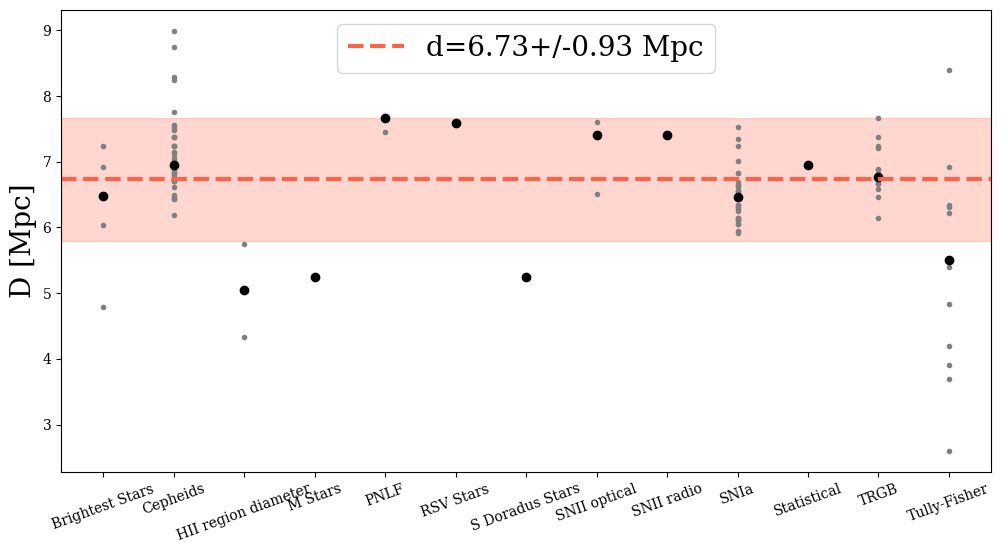

In [41]:
# intbl['D(Mpc)']
methods = np.unique(intbl['Method'])

plt.figure(figsize=(12, 6))

dmed_all = np.median(intbl['D(Mpc)'])
dstd_all = np.std(intbl['D(Mpc)'])

for mm, method in enumerate(methods):
	d = intbl['D(Mpc)'][intbl['Method']==method]
	dmed = np.median(d)
	plt.plot([mm]*len(d), d, ls='none', marker='.', c='grey')
	plt.plot(mm, dmed, marker='o', c='k')

plt.axhline(y=dmed_all, ls='--', lw=3, c='tomato', label=f'd={dmed_all:1.2f}+/-{dstd_all:1.2f} Mpc')
plt.axhspan(ymin=dmed_all-dstd_all, ymax=dmed_all+dstd_all, color='tomato', alpha=0.25)

plt.legend(loc='upper center', ncol=4, fontsize=20)
plt.ylabel('D [Mpc]')
_ = plt.xticks(np.arange(len(methods)), methods, rotation=20)